In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

(Role of selection in GA’s) [2 points] A simple (1 + 1)-GA for binary problems works
as follows.

(a) Randomly generate a bit sequence $x$.

(b) Create a copy of $x$ and invert each of its bits with probability $p$. Let $x_m$ be the
result.

(c) If $x_m$ is closer to the goal sequence than $x$ then replace $x$ with $x_m$.

(d) Repeat the process from step (b) with the new $x$ until the goal sequence is
reached.

The Counting Ones problem amounts to find a bit string whose sum of its entries is
maximum. Implement a simple (1 + 1)-GA for solving the Counting Ones problem.

(a) Use bit strings of length $l = 100$ and a mutation rate $p = 1/l$. For a run of 1500
iterations, plot the best fitness against the elapsed number of iterations.



In [3]:
def oneplusoneGA(l):
  p = 1/l
  max_fitness = l

  # randomly generate bit sequence x
  rng = np.random.default_rng()
  x = rng.integers(2, size=l, dtype=int)
  fitness_x = sum(x)

  # initialize empty arrays to store the data to be plotted, 
  # namely the best fitness as a function of iterations
  best_fitness = []
  iterations = []

  for iteration in range(1500):
    # create a copy of x to be modified
    x_m = x.copy()

    # invert each bit with probability p
    for i in range(l):
      if random.random() < p:
        if x_m[i] == 1:
          x_m[i] = 0
        else:
          x_m[i] = 1

    # replace x with x_m if it is closer to the goal sequence
    fitness_x_m = sum(x_m)
    if (fitness_x_m) > fitness_x:
      # Cheeck if goal is reached
      if fitness_x_m == max_fitness:
        print(f"reached max fitness {fitness_x_m}")
      # Replace with offspring for next gen
      x = x_m 
      fitness_x = fitness_x_m
      
    # add the current iteration's best fitness to the array that stores
    # the ensemble of best fitnesses per iteration
    best_fitness.append(fitness_x)
    iterations.append(iteration)

  return iterations, best_fitness

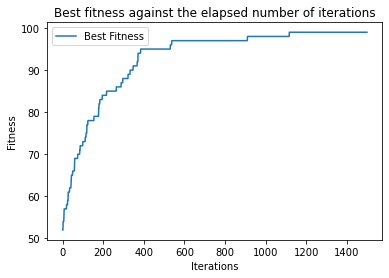

In [4]:
iterations, best_fitness = oneplusoneGA(100)

# plot the best fitness over the ran iterations
def plotPop():
  plt.plot(iterations, best_fitness, label = 'Best Fitness')
  plt.xlabel('Iterations')
  plt.ylabel('Fitness')
  plt.title('Best fitness against the elapsed number of iterations')
  plt.legend(loc='best')
  plt.show()

plotPop()

(b) Perform 10 runs (again, 1500 iterations). In a single Figure, plot best fitness
against elapsed number of iterations of each run. How many times the algorithm
finds the optimum?

reached max fitness 100
reached max fitness 100
reached max fitness 100
reached max fitness 100
reached max fitness 100
reached max fitness 100
reached max fitness 100
reached max fitness 100
reached max fitness 100
reached max fitness 100


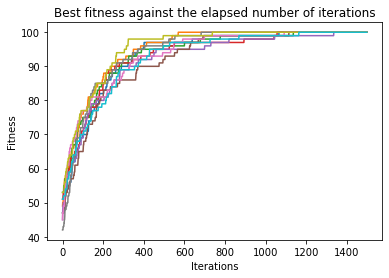

In [5]:
runs = 10

# plot the best fitness over the ran iterations and runs
for i in range(runs):
  iterations, best_fitness = oneplusoneGA(100)
  plt.plot(iterations, best_fitness)
  plt.xlabel('Iterations')
  plt.ylabel('Fitness')
  plt.title('Best fitness against the elapsed number of iterations')
plt.show()


In the Counting Ones problem, the aim is to to find a bit string such that the sum of its entries is maximum. Given that we are considering bit strings, this amounts in finding the string $(1, ..., 1)$ such that all $l$ entries of the bit string of length $l$ are 1. This goal was reached in all of the 10 trials.

(c) Now replace (c) in the above algorithm with (c’ ): replace $x$ with $x_m$. Perform
10 runs (again, 1500 iterations). In a single Figure, plot the best fitness against
the elapsed number of iterations. Is there a difference in performance when
using this modification? Justify your answer

In [6]:
def modified_oneplusoneGA(l):
  p = 1/l
  max_fitness = l

  # randomly generate bit sequence x
  rng = np.random.default_rng()
  x = rng.integers(2, size=l, dtype=int)
  fitness_x = sum(x)

  # initialize empty arrays to store the data to be plotted, 
  # namely the best fitness as a function of iterations
  best_fitness = []
  iterations = []

  for iteration in range(1500):
    # create a copy of x to be modified
    x_m = x.copy()

    # invert each bit with probability p
    for i in range(l):
      if random.random() < p:
        if x_m[i] == 1:
          x_m[i] = 0
        else:
          x_m[i] = 1

    # replace x with x_m
    x = x_m 
    fitness_x = sum(x_m)

    # add the current iteration's best fitness to the array that stores
    # the ensemble of best fitnesses per iteration
    best_fitness.append(fitness_x)
    iterations.append(iteration)

  return iterations, best_fitness

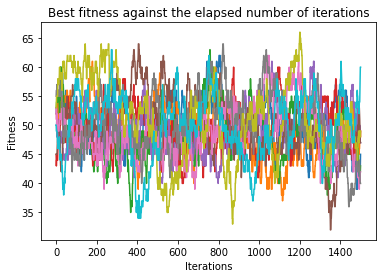

In [7]:
runs = 10

# plot the best fitness over the ran iterations and runs
for i in range(runs):
  iterations, best_fitness = modified_oneplusoneGA(100)
  plt.plot(iterations, best_fitness, label = 'Best Fitness')
  plt.xlabel('Iterations')
  plt.ylabel('Fitness')
  plt.title('Best fitness against the elapsed number of iterations')
  #plt.legend(loc='best')
plt.show()

By replacing (c) in the previously used algorithm with (c’): replace $x$ with $x_m$, a clear difference in performances can be observed in the obtained plots. Using step (c') resembles a random walk whereas using step (c) is getting gradually closer to the optimum of the problem. This is due to the fact that as much as $x_m$ can yield to a better string with regards to the Counting Ones problem's goal, it can as much yield to a worse string. The mutations applied are bit-flip mutations, which means that each position in a given instance of a string may be flipped with probability $p$. This does not exclude the bits of the string with entry '$1$'. The aim of the Counting Ones problem is to obtain the string $(1, ..., 1)$ such that all $l$ entries of the bit string of length $l$ are 1. By randomly mutating entries that are already equal to $1$ and keeping this mutated string for the next iteration, the algorithm is getting farther from the optimum. Thus, over 1500, the function plotting the best fitness looks like a random search. The original algorithm on the other hand uses an elitist selection scheme. This means, that every step will yield a fitness greater or equal to the current fitness. This is a more directed search.